# Computergestützte Mathematik zur Analysis

Vorlesung vom 02.02.2023

&copy; 2023 Prof. Dr. Rüdiger W. Braun 

In [1]:
from sympy import *
init_printing()
import numpy as np
from matplotlib import pyplot as plt

In [2]:
x = Symbol('x', positive=True)
y = Function('y')

In [3]:
dgl = Eq(y(x).diff(x), sqrt(x*y(x)))
dgl

In [4]:
lsg = dsolve(dgl)
lsg

In [5]:
phi = lsg.rhs

In [6]:
w_liste = [Rational(1,50), Rational(1,9)]
f_list = []
for w in w_liste:
    ab_glg = Eq(phi.subs(x,1), w)
    ab_lsg = solve({ab_glg})
    for l in ab_lsg:
        f_ab = phi.subs(l).simplify()
        display(f_ab)
        f_list.append(f_ab)

In [7]:
fn_list = []
for f_ab in f_list:
    fn = lambdify(x, f_ab)
    fn_list.append(fn)

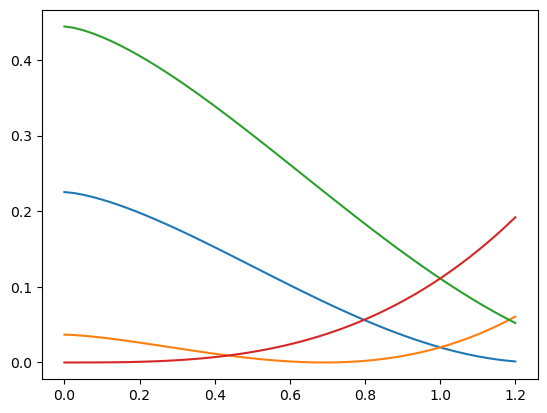

In [8]:
xn = np.linspace(0, 1.2)
fig = plt.figure()
ax = fig.add_subplot(111)
for ff in fn_list:
    ax.plot(xn, ff(xn))

5 Verstöße gegen Picard-Lindelöf

In [9]:
nx = 15
ny = 19 
xq = np.linspace(0, 1.2, nx)
yq = np.linspace(0, .5, ny)
X, Y = np.meshgrid(xq, yq)
vf = np.zeros_like(X)
for j in range(nx):
    for k in range(ny):
        vf[k,j] = dgl.rhs.subs({x: xq[j], y(x): yq[k]})
U = np.ones_like(X)
V = vf
ax.quiver(X, Y, U, V, angles='xy');

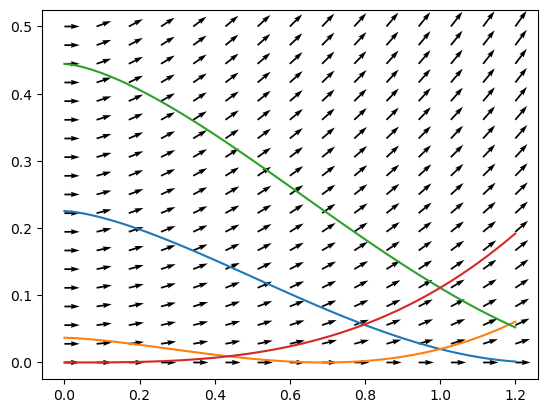

In [10]:
fig

Alle fallenden Äste sind Unsinn!

# Bernoullische Differentialgleichungen

Eine Differentialgleichung der Form
  \begin{equation*}
    y' + g(x) y + h(x) y^\alpha = 0. \qquad (1)
  \end{equation*}
heißt *Bernoullische Differentialgleichung*.

Durch die Substitution $y=w^{1/(1-\alpha)}$ wird sie in eine lineare Differentialgleichung transformiert.  Das geht aber nur dort, wo $w>0$.

In [13]:
alpha = Rational(1,2)
1/(1-alpha)

In [14]:
w = Function('w', positive=True)

In [15]:
ldgl = dgl.subs(y(x), w(x)**2)
ldgl

In [16]:
tmp = ldgl.doit()
tmp

In [18]:
tmp_lsg = solve(tmp, w(x).diff(x))
tmp_lsg

In [19]:
dgl2 = Eq(w(x).diff(x), tmp_lsg[0])
dgl2

Die Anfangsbedingung $y(1)=\frac19$ übersetzt sich zu $w(1)=\frac13$.

In [20]:
ics = {w(1): Rational(1,3)}
lsg = dsolve(dgl2, ics=ics)
lsg

In [21]:
phi = lsg.rhs**(1/(1-alpha))
phi

In [22]:
dgl.subs(y(x), phi).doit()

True

Wo kommt die falsche Lösung her?

Es gilt $y = w^{\frac1{1-\alpha}}$.  In diesem Beispiel ist $\frac1{1-\alpha} = 2$.

Setzt man also $w(1) = -\frac13$, dann hat man ebenfalls $y(1)=\frac19$.  Das geht aber nicht gut:

In [23]:
ics = {w(1): -Rational(1,3)}
lsg2 = dsolve(dgl2, ics=ics)
lsg2

In [24]:
phi2 = lsg2.rhs**(1/(1-alpha))
phi2

In [25]:
glg = dgl.subs(y(x), phi2).doit()
glg

In [26]:
glg.subs(x,1)

False

# Mayavi

`conda install -c conda-forge mayavi ipywidgets ipyevents`

In [27]:
from mayavi import mlab
mlab.init_notebook()

Notebook initialized with ipy backend.


In [28]:
rn = np.linspace(0, 5*np.pi)
theta_n = np.linspace(0, 2*np.pi)
R, Theta = np.meshgrid(rn, theta_n)
X = R*np.cos(Theta)
Y = R*np.sin(Theta)
W = np.cos(R)

In [29]:
mlab.mesh(X, Y, W)

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01\x90\x00\x00\x01^\x08\x02\x00\x00\x00$?\xde_\x00\…

In [31]:
mlab.close()
#mlab.mesh(X, Y, W, scalars=1/(R+10), colormap='winter')
mlab.mesh(X,Y,W,scalars=X**2)

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01\x90\x00\x00\x01^\x08\x02\x00\x00\x00$?\xde_\x00\…

# Das Möbiusband

In [32]:
def moebiusband():
    t = Symbol('t')  
    s = Symbol('s')  # Seele bei s=0
    M = Matrix([ 3*cos(t) + s*sin(t/2),
                       3*sin(t),
                       s*cos(t/2)])
    sn = np.linspace(-1, 1)
    tn = np.linspace(0, 2*np.pi)
    S1, T1 = np.meshgrid(sn, tn)
    fn = [lambdify((s,t), M[j]) for j in range(3)]
    Xn = [fn[j](S1, T1) for j in range(3)]
    return M, Xn, S1   

In [33]:
M, Xn, S1 = moebiusband()

In [34]:
try:
    mlab.close()
except AttributeError:
    pass
mlab.mesh(Xn[0], Xn[1], Xn[2], scalars=S1)

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01\x90\x00\x00\x01^\x08\x02\x00\x00\x00$?\xde_\x00\…

In [35]:
def normale(M):
    s = Symbol('s')
    t = Symbol('t')
    seele = M.subs(s, 0)
    Mt = seele.diff(t)
    Ms = M.diff(s)
    display(Mt, Ms)
    N = Mt.cross(Ms)   # Kreuzprodukt
    display(N)
    N_ein = seele + s*N/N.norm()
    sn = np.linspace(0.05, 1)
    tn = np.linspace(0, 2*np.pi)
    S1, T1 = np.meshgrid(sn, tn)
    Nn = [lambdify((s,t), N_ein[j]) for j in range(3)]
    Xn = [Nn[j](S1, T1) for j in range(3)]
    return Xn

In [36]:
Nn = normale(M)

⎡-3⋅sin(t)⎤
⎢         ⎥
⎢3⋅cos(t) ⎥
⎢         ⎥
⎣    0    ⎦

⎡   ⎛t⎞⎤
⎢sin⎜─⎟⎥
⎢   ⎝2⎠⎥
⎢      ⎥
⎢  0   ⎥
⎢      ⎥
⎢   ⎛t⎞⎥
⎢cos⎜─⎟⎥
⎣   ⎝2⎠⎦

⎡     ⎛t⎞        ⎤
⎢3⋅cos⎜─⎟⋅cos(t) ⎥
⎢     ⎝2⎠        ⎥
⎢                ⎥
⎢            ⎛t⎞ ⎥
⎢3⋅sin(t)⋅cos⎜─⎟ ⎥
⎢            ⎝2⎠ ⎥
⎢                ⎥
⎢      ⎛t⎞       ⎥
⎢-3⋅sin⎜─⎟⋅cos(t)⎥
⎣      ⎝2⎠       ⎦

In [38]:
mlab.mesh(Nn[0], Nn[1], Nn[2], color=(0, .3, 0)) 

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01\x90\x00\x00\x01^\x08\x02\x00\x00\x00$?\xde_\x00\…

# Klausurdurchführung

https://www.math.uni-duesseldorf.de/~internet/compana22/posts/klausurdurchfuhrung/